In [ ]:
# https://github.com/divamgupta/image-segmentation-keras

<a class="anchor" id="2."></a> 
# 2.Implementation of Segnet, FCN, UNet , PSPNet and other models in Keras

Source Github Link: https://github.com/divamgupta/image-segmentation-keras

Models
Following models are supported:

| model_name       | Base Model     | Segmentation Model     |
| :------------- | :----------: | -----------: |
|  fcn_8 | Vanilla CNN  | FCN8   |
|  fcn_32  | Vanilla CNN | FCN8 |
|  fcn_8_vgg | VGG 16  | FCN8   |
|  fcn_32_vgg  | VGG 16 | FCN32 |
|  fcn_8_resnet50 | Resnet-50  | FCN32  |
|  fcn_32_resnet50  | Resnet-50 | FCN32 |
| fcn_8_mobilenet  | MobileNet  | FCN32   |
| fcn_32_mobilenet   | MobileNet | FCN32 |
| pspnet  | Vanilla CNN  | PSPNet   |
| vgg_pspnet   | VGG 16 | PSPNet |
|  resnet50_pspnet  | Resnet-50  |  PSPNet  |
| unet_mini   | Vanilla Mini CNN  | U-Net   |
| unet   | Vanilla CNN  | U-Net   |
| vgg_unet   | VGG 16  | U-Net   |
| resnet50_unet   | Resnet-50  |  U-Net  |
|  mobilenet_unet  | MobileNet  | U-Net   |
| segnet   | Vanilla CNN  | Segnet   |
| vgg_segnet   | VGG 16  |  Segnet  |
|  resnet50_segnet  | Resnet-50  | Segnet   |
|  mobilenet_segnet  | MobileNet  | Segnet   |
		
        



In [ ]:
!cp '../input/vggunetckp/vgg_unet.19' '/kaggle/working/vgg_unet'
!cp '../input/vggunetckp/vgg_segnet.19' '/kaggle/working/vgg_segnet'

In [ ]:
import time

In [ ]:
!pip install keras-segmentation

### Train

In [ ]:
# FOR TRAIN ONLY

# kaggle_commit = True

# epochs = 20
# if kaggle_commit:
#     epochs = 5
# n_classes = 23 # Aerial Semantic Segmentation Drone Dataset tree, gras, other vegetation, dirt, gravel, rocks, water, paved area, pool, person, dog, car, bicycle, roof, wall, fence, fence-pole, window, door, obstacle
# from keras_segmentation.models.unet import vgg_unet
# from keras_segmentation.models.segnet import vgg_segnet
# models = []
# for model_name in ['vgg_segnet', 'vgg_unet']:
#     model = None
#     if model_name == 'vgg_unet':
#         model = vgg_unet(n_classes=n_classes,  input_height=416, input_width=608  )
#     elif model_name == 'vgg_segnet':
#         model = vgg_segnet(n_classes=n_classes,  input_height=416, input_width=608  )
#     print('Start trainning ' + model_name)
#     model.train( 
#         train_images =  "/kaggle/input/customziedsemanticdronedataset/semantic_drone_dataset/original_images/train/",
#         train_annotations = "/kaggle/input/customziedsemanticdronedataset/semantic_drone_dataset/label_images_semantic/train/",
#         val_images="/kaggle/input/customziedsemanticdronedataset/semantic_drone_dataset/original_images/test/",
#         val_annotations="/kaggle/input/customziedsemanticdronedataset/semantic_drone_dataset/label_images_semantic/test/",
#         checkpoints_path = model_name , epochs=epochs, auto_resume_checkpoint=True, validate=False, verify_dataset=False
#     )
#     print('Model evaluate segmentation: ')
#     print(model.evaluate_segmentation(inp_images_dir='/kaggle/input/customziedsemanticdronedataset/semantic_drone_dataset/original_images/test/',annotations_dir='/kaggle/input/customziedsemanticdronedataset/semantic_drone_dataset/label_images_semantic/test/'))


In [ ]:
# print(vgg_unet_model.evaluate_segmentation(inp_images_dir='/kaggle/input/customziedsemanticdronedataset/semantic_drone_dataset/original_images/train/',annotations_dir='/kaggle/input/customziedsemanticdronedataset/semantic_drone_dataset/label_images_semantic/train/'))

### Prediction

In [ ]:
from keras_segmentation.models.unet import vgg_unet
from keras_segmentation.models.segnet import vgg_segnet
n_classes = 23
vgg_unet_model = vgg_unet(n_classes=n_classes,  input_height=416, input_width=608  )
vgg_unet_model.load_weights('./vgg_unet')
vgg_segnet_model = vgg_segnet(n_classes=n_classes,  input_height=416, input_width=608  )
vgg_segnet_model.load_weights('./vgg_segnet')

In [ ]:
# start_unet = time.time()
# print(vgg_unet_model.evaluate_segmentation(inp_images_dir='/kaggle/input/customziedsemanticdronedataset/semantic_drone_dataset/original_images/test/',annotations_dir='/kaggle/input/customziedsemanticdronedataset/semantic_drone_dataset/label_images_semantic/test/'))
# elapsed_unet = time.time() - start_unet
# print('vgg_unet_model: ' + str(elapsed_unet))
# start_segnet = time.time()
# print(vgg_segnet_model.evaluate_segmentation(inp_images_dir='/kaggle/input/customziedsemanticdronedataset/semantic_drone_dataset/original_images/test/',annotations_dir='/kaggle/input/customziedsemanticdronedataset/semantic_drone_dataset/label_images_semantic/test/'))
# elapsed_segnet = time.time() - start_segnet
# print('elapsed_segnet: ' + str(elapsed_segnet))


In [ ]:
import time
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

start = time.time()
image_name = "540"
input_image = "../input/customziedsemanticdronedataset/semantic_drone_dataset/original_images/test/" + image_name + ".jpg"
start_unet = time.time()
out = vgg_unet_model.predict_segmentation(
    inp=input_image,
    out_fname="out.png"
)
elapsed_unet = time.time() - start_unet
start_segnet = time.time()
segnet_out = vgg_segnet_model.predict_segmentation(
    inp=input_image,
    out_fname="segnet-out.png"
)
elapsed_segnet = time.time() - start_segnet
fig, axs = plt.subplots(1, 4, figsize=(20, 20), constrained_layout=True)

img_orig = Image.open(input_image)
axs[0].imshow(img_orig)
axs[0].set_title('ORIGINAL IMAGE')
axs[0].grid(False)

axs[1].imshow(out)
axs[1].set_title('UNET')
axs[1].grid(False)

axs[2].imshow(segnet_out)
axs[2].set_title('SEGNET')
axs[2].grid(False)

validation_image = "../input/customziedsemanticdronedataset/semantic_drone_dataset/label_images_semantic/test/" + image_name + ".png"
axs[3].imshow( Image.open(validation_image))
axs[3].set_title('GROUND TRUTH')
axs[3].grid(False)

done = time.time()
elapsed = done - start

In [ ]:
print(elapsed)
print(out)
print(out.shape)

print('elapsed_unet: ' + str(elapsed_unet))
print('elapsed_segnet: ' + str(elapsed_segnet))

In [ ]:
# from keras_segmentation.models.segnet import vgg_segnet

# n_classes = 23 # Aerial Semantic Segmentation Drone Dataset tree, gras, other vegetation, dirt, gravel, rocks, water, paved area, pool, person, dog, car, bicycle, roof, wall, fence, fence-pole, window, door, obstacle
# model = vgg_segnet(n_classes=n_classes)

# model.train( 
#     train_images =  "/kaggle/input/semantic-drone-dataset/semantic_drone_dataset/original_images/",
#     train_annotations = "/kaggle/input/semantic-drone-dataset/semantic_drone_dataset/label_images_semantic/",
#     checkpoints_path = "vgg_segnet" , epochs=epochs
# )
# # print(keras_segmentation.models.unet.modules.keys)
# # from keras_segmentation.models.unet import vgg_unet


# Results (Backbone: VGG)


In [ ]:
# Start trainning vgg_unet
# Epoch 1/20
# 512/512 [==============================] - 708s 1s/step - loss: 1.5339 - accuracy: 0.5809
# saved  vgg_unet.0
# Epoch 2/20
# 512/512 [==============================] - 694s 1s/step - loss: 1.1815 - accuracy: 0.6484
# saved  vgg_unet.1
# Epoch 3/20
# 512/512 [==============================] - 695s 1s/step - loss: 1.0710 - accuracy: 0.6793
# saved  vgg_unet.2
# Epoch 4/20
# 512/512 [==============================] - 695s 1s/step - loss: 0.9827 - accuracy: 0.7061
# saved  vgg_unet.3
# Epoch 5/20
# 512/512 [==============================] - 695s 1s/step - loss: 0.9119 - accuracy: 0.7270
# saved  vgg_unet.4
# Epoch 6/20
# 512/512 [==============================] - 707s 1s/step - loss: 0.8394 - accuracy: 0.7486
# saved  vgg_unet.5
# Epoch 7/20
# 512/512 [==============================] - 702s 1s/step - loss: 0.7570 - accuracy: 0.7746
# saved  vgg_unet.6
# Epoch 8/20
# 512/512 [==============================] - 701s 1s/step - loss: 0.6925 - accuracy: 0.7939
# saved  vgg_unet.7
# Epoch 9/20
# 512/512 [==============================] - 698s 1s/step - loss: 0.6210 - accuracy: 0.8151
# saved  vgg_unet.8
# Epoch 10/20
# 512/512 [==============================] - 699s 1s/step - loss: 0.5694 - accuracy: 0.8304
# saved  vgg_unet.9
# Epoch 11/20
# 512/512 [==============================] - 698s 1s/step - loss: 0.5165 - accuracy: 0.8461
# saved  vgg_unet.10
# Epoch 12/20
# 512/512 [==============================] - 696s 1s/step - loss: 0.4617 - accuracy: 0.8627
# saved  vgg_unet.11
# Epoch 13/20
# 512/512 [==============================] - 700s 1s/step - loss: 0.4208 - accuracy: 0.8749
# saved  vgg_unet.12
# Epoch 14/20
# 512/512 [==============================] - 703s 1s/step - loss: 0.3742 - accuracy: 0.8889
# saved  vgg_unet.13
# Epoch 15/20
# 512/512 [==============================] - 695s 1s/step - loss: 0.3427 - accuracy: 0.8983
# saved  vgg_unet.14



# Start trainning vgg_segnet
# Loading the weights from latest checkpoint  vgg_segnet.0
# Epoch 1/20
# 512/512 [==============================] - 714s 1s/step - loss: 1.5872 - accuracy: 0.5714
# saved  vgg_segnet.0
# Epoch 2/20
# 512/512 [==============================] - 698s 1s/step - loss: 1.4656 - accuracy: 0.6076
# saved  vgg_segnet.1
# Epoch 3/20
# 512/512 [==============================] - 696s 1s/step - loss: 1.3238 - accuracy: 0.6378
# saved  vgg_segnet.2
# Epoch 4/20
# 512/512 [==============================] - 696s 1s/step - loss: 1.1879 - accuracy: 0.6626
# saved  vgg_segnet.3
# Epoch 5/20
# 512/512 [==============================] - 695s 1s/step - loss: 1.0878 - accuracy: 0.6874
# saved  vgg_segnet.4
# Epoch 6/20
# 512/512 [==============================] - 699s 1s/step - loss: 1.0210 - accuracy: 0.7047
# saved  vgg_segnet.5
# Epoch 7/20
# 512/512 [==============================] - 704s 1s/step - loss: 0.9397 - accuracy: 0.7245
# saved  vgg_segnet.6
# Epoch 8/20
# 512/512 [==============================] - 711s 1s/step - loss: 0.8878 - accuracy: 0.7408
# saved  vgg_segnet.7
# Epoch 9/20
# 512/512 [==============================] - 719s 1s/step - loss: 0.8179 - accuracy: 0.7594
# saved  vgg_segnet.8
# Epoch 10/20
# 512/512 [==============================] - 698s 1s/step - loss: 0.7850 - accuracy: 0.7691
# saved  vgg_segnet.9
# Epoch 11/20
# 512/512 [==============================] - 701s 1s/step - loss: 0.7244 - accuracy: 0.7865
# saved  vgg_segnet.10
# Epoch 12/20
# 512/512 [==============================] - 698s 1s/step - loss: 0.6933 - accuracy: 0.7952
# saved  vgg_segnet.11
# Epoch 13/20
# 512/512 [==============================] - 707s 1s/step - loss: 0.6480 - accuracy: 0.8087
# saved  vgg_segnet.12
# Epoch 14/20
# 512/512 [==============================] - 723s 1s/step - loss: 0.6276 - accuracy: 0.8129
# saved  vgg_segnet.13
# Epoch 15/20
# 512/512 [==============================] - 720s 1s/step - loss: 0.5831 - accuracy: 0.8263
# saved  vgg_segnet.14
# Epoch 16/20
# 512/512 [==============================] - 710s 1s/step - loss: 0.5512 - accuracy: 0.8351
# saved  vgg_segnet.15
# Epoch 17/20
# 512/512 [==============================] - 710s 1s/step - loss: 0.5232 - accuracy: 0.8427
# saved  vgg_segnet.16
# Epoch 18/20
# 512/512 [==============================] - 706s 1s/step - loss: 0.4923 - accuracy: 0.8519
# saved  vgg_segnet.17
# Epoch 19/20
# 512/512 [==============================] - 705s 1s/step - loss: 0.4946 - accuracy: 0.8515
# saved  vgg_segnet.18
# Epoch 20/20
# 512/512 [==============================] - 724s 1s/step - loss: 0.4488 - accuracy: 0.8654
# {'frequency_weighted_IU': 0.7396276385324942, 'mean_IU': 0.4142282055343959, 'class_wise_IU': array([0.6283008 , 0.89201673, 0.3146251 , 0.85808337, 0.65618186,
#        0.82793787, 0.10199099, 0.70008597, 0.58409139, 0.76913934,
#        0.29419667, 0.13517449, 0.        , 0.09904147, 0.        ,
#        0.2648533 , 0.        , 0.5327716 , 0.17824968, 0.49366883,
#        0.40093133, 0.48764754, 0.3082604 ])}

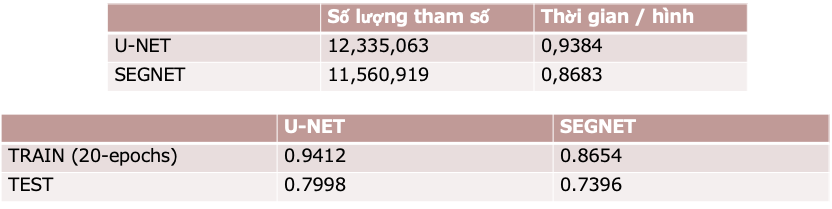!

In [ ]:
# vgg_unet_model.summary()

In [ ]:
# vgg_segnet_model.summary()

In [ ]:
# from keras_segmentation.models.unet import mobilenet_unet
# n_classes = 23
# mobile_unet_model = mobilenet_unet(n_classes=n_classes)
# mobile_unet_model.summary()